## Import Statements

In [ ]:
import datetime
import pickle
import warnings
from datetime import timedelta

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

warnings.simplefilter(action="ignore", category=FutureWarning)

## Data Loading

For Colab

In [6]:
from google.colab import files
files.upload()

Saving encounters.csv to encounters (1).csv
Saving patients.csv to patients (1).csv


Specify relevant columns to enhance performance

In [7]:
encounters_df = pd.read_csv(
    "encounters.csv",
    usecols=["PATIENT", "START", "REASONCODE", "CODE"],
    parse_dates=["START"],
)
patients_df = pd.read_csv(
    "patients.csv",
    usecols=["Id", "RACE", "GENDER", "BIRTHDATE", "DEATHDATE"],
    parse_dates=["BIRTHDATE", "DEATHDATE"],
)

In [8]:
encounters_df

,START,PATIENT,CODE,REASONCODE
0,2019-02-16 01:02:32+00:00,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,185345009,65363002.0
1,2019-08-02 01:02:32+00:00,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,410620009,NaN
2,2019-10-31 01:02:32+00:00,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,185345009,65363002.0
3,2020-01-31 01:02:32+00:00,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,410620009,NaN
4,2020-03-02 01:02:32+00:00,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,185345009,NaN
...,...,...,...,...
321523,2020-05-19 06:03:58+00:00,2712205f-755e-4897-acb3-926895b7d635,185347001,NaN
321524,2020-05-26 06:03:58+00:00,2712205f-755e-4897-acb3-926895b7d635,702927004,NaN
321525,2020-05-22 06:03:58+00:00,2712205f-755e-4897-acb3-926895b7d635,185347001,NaN
321526,2020-05-22 06:03:58+00:00,2712205f-755e-4897-acb3-926895b7d635,185347001,NaN


In [9]:
patients_df

,Id,BIRTHDATE,DEATHDATE,RACE,GENDER
0,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,2017-08-24,NaT,white,M
1,067318a4-db8f-447f-8b6e-f2f61e9baaa5,2016-08-01,NaT,white,F
2,ae9efba3-ddc4-43f9-a781-f72019388548,1992-06-30,NaT,white,M
3,199c586f-af16-4091-9998-ee4cfc02ee7a,2004-01-09,NaT,white,F
4,353016ea-a0ff-4154-85bb-1cf8b6cedf20,1996-11-15,NaT,white,M
...,...,...,...,...,...
12347,eec72396-d10e-4b8e-8fb6-25fc1e396031,1962-08-17,NaT,asian,F
12348,3daf2b90-c439-469f-bb44-fb6109c6a8a7,1918-10-20,1999-11-01,white,F
12349,cb03d88e-7f08-46a1-be78-70d9fe8262a7,1918-10-20,2009-08-07,white,F
12350,435be43f-cb57-442f-aeb2-51018b030ed0,1918-10-20,NaT,white,F


## Data Extracting

Find all patients that were admitted to the hospital because of Covid-19

In [ ]:
covid_encounters_df = encounters_df[
    encounters_df.REASONCODE.isin([840539006])
    | encounters_df.CODE.isin([1505002, 305351004])
]
covid_encounters_df

Merge from two tables

In [11]:
covid_patients_df = covid_encounters_df.merge(
    patients_df, left_on="PATIENT", right_on="Id"
).drop(["Id"], axis=1)
covid_patients_df["DIED"] = (~pd.isnull(covid_patients_df.DEATHDATE)).astype(int)
covid_patients_df["AGE"] = (
    (covid_patients_df.START.dt.tz_localize(None) - covid_patients_df.BIRTHDATE).dt.days
    / 365.2425
).round(1)
covid_patients_df

,START,PATIENT,CODE,REASONCODE,BIRTHDATE,DEATHDATE,RACE,GENDER,DIED,AGE
0,2020-02-19 05:30:14+00:00,f58bf921-cba1-475a-b4f8-dc6fa3b8f89c,1505002,840539006.0,2019-06-12,NaT,white,F,0,0.7
1,2020-03-07 13:00:03+00:00,f39d31c4-9ba8-4468-9f48-065a8dc13e0f,1505002,840539006.0,1983-09-30,NaT,white,F,0,36.4
2,2020-03-15 00:32:17+00:00,da0334da-83d5-443c-9f80-185654a0c534,1505002,840539006.0,1959-06-23,NaT,white,F,0,60.7
3,2020-03-01 02:46:43+00:00,b837f045-b9b5-486a-ad32-94b9f519737f,1505002,840539006.0,1958-05-09,NaT,white,F,0,61.8
4,2020-03-10 04:42:36+00:00,5b61f0fa-a3c4-4e70-a322-ad85c47aca12,1505002,840539006.0,1987-08-31,NaT,white,M,0,32.5
...,...,...,...,...,...,...,...,...,...,...
2716,2020-03-21 19:47:58+00:00,6592de1d-1d0a-46c9-8a45-89e9cadbca27,1505002,840539006.0,1957-12-09,NaT,white,M,0,62.3
2717,2020-03-30 19:47:58+00:00,6592de1d-1d0a-46c9-8a45-89e9cadbca27,305351004,840539006.0,1957-12-09,NaT,white,M,0,62.3
2718,2020-03-31 19:47:58+00:00,6592de1d-1d0a-46c9-8a45-89e9cadbca27,76464004,840539006.0,1957-12-09,NaT,white,M,0,62.3
2719,2020-03-08 02:55:03+00:00,534ed6ac-1178-47ce-a0c4-ecf779613143,1505002,840539006.0,1980-11-12,NaT,white,F,0,39.3


Prepare dataset for modeling, keep relevant columns only

In [12]:
covid_patients_df =covid_patients_df.loc[:,('GENDER','RACE','AGE','DIED')]
covid_patients_df

,GENDER,RACE,AGE,DIED
0,F,white,0.7,0
1,F,white,36.4,0
2,F,white,60.7,0
3,F,white,61.8,0
4,M,white,32.5,0
...,...,...,...,...
2716,M,white,62.3,0
2717,M,white,62.3,0
2718,M,white,62.3,0
2719,F,white,39.3,0


##Peform exploratory data analysis using seaborn/matplotlib
>plot scattered data points, significant pattern difference is observed between survivied and died patients

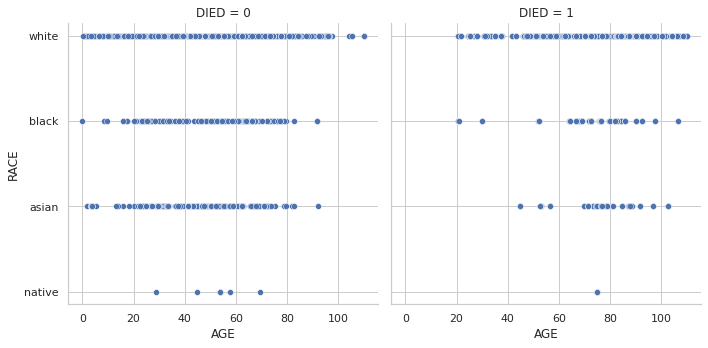

In [ ]:
sns.set_theme(style="whitegrid")
sns.relplot(
    data=covid_patients_df,
    x="AGE", y="RACE", col="DIED",
)

Further histogram plots indicate age averages are 48 and 73 for survived and died groups 

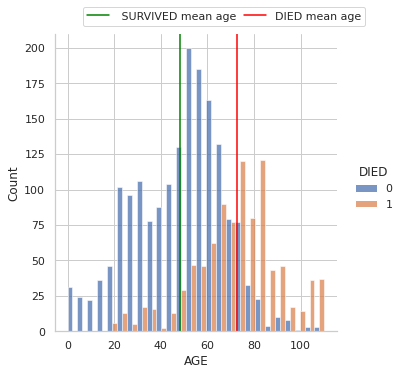

In [ ]:
sns.displot(covid_patients_df, x="AGE", hue="DIED", multiple="dodge")
plt.axvline(x=covid_patients_df.query('DIED == 0')['AGE'].mean(), color='green', label=" SURVIVED mean age") 
plt.axvline(x=covid_patients_df.query('DIED == 1')['AGE'].mean(), color='red', label="DIED mean age")
plt.legend(bbox_to_anchor=(0.1, 1.09, 1, 0), loc=2, ncol=2, mode="expand", borderaxespad=0)


more plots

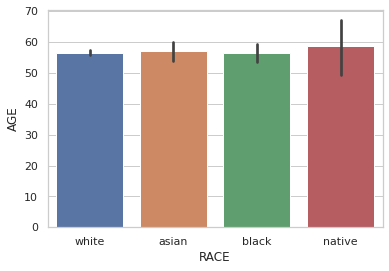

In [ ]:
sns.set_theme(style="whitegrid")
sns.barplot(x=covid_patients_df.RACE, y=covid_patients_df.AGE)

Among all races, Average AGE seems not change much 

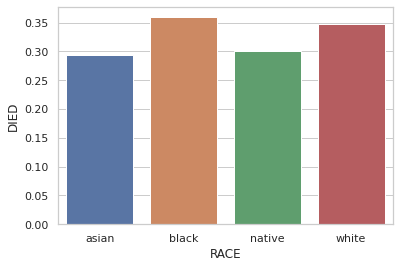

In [ ]:
race_df = covid_patients_df.groupby("RACE").mean().reset_index()
sns.set_theme(style="whitegrid")
sns.barplot(x=race_df.RACE, y=race_df.DIED)

The average number of DIED patients changes  but not significant amont all races 

In [ ]:
covid_patients_df.RACE.describe()

count      2721
unique        4
top       white
freq       2282
Name: RACE, dtype: object

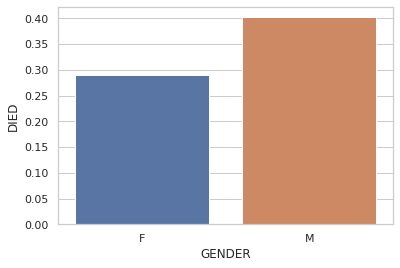

In [ ]:
gender_df = covid_patients_df.groupby("GENDER").mean().reset_index()
sns.barplot(x=gender_df.GENDER, y=gender_df.DIED)

In [ ]:
gender_df

,GENDER,AGE,DIED
0,F,56.305866,0.289700
1,M,56.891761,0.402116


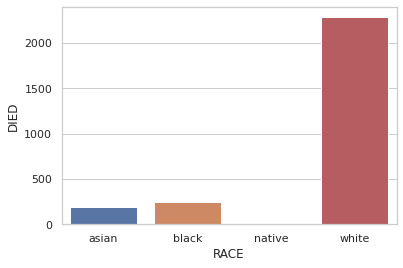

In [ ]:
gender_df = covid_patients_df.groupby("RACE").count().reset_index()
sns.barplot(x=gender_df.RACE, y=gender_df.DIED)

RACE native has very few counts

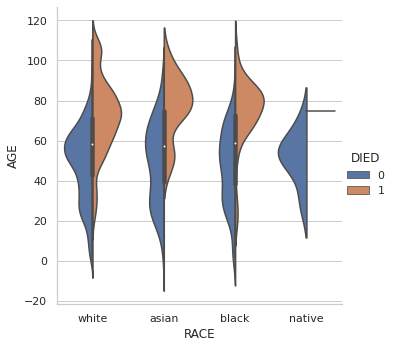

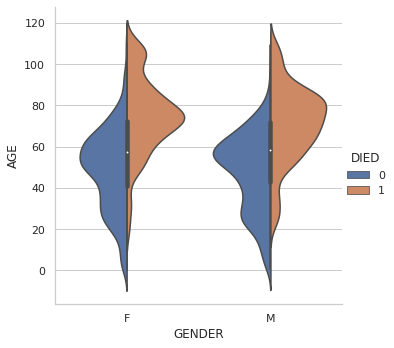

In [ ]:
sns.catplot(data=covid_patients_df, kind="violin", x="RACE", y="AGE", hue="DIED", split=True)
sns.catplot(data=covid_patients_df, kind="violin", x="GENDER", y="AGE", hue="DIED", split=True)


Transform categorical features to number representations

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler 

temp_df = covid_patients_df[['GENDER', 'RACE', 'AGE', 'DIED']]
temp_df.loc[:,'GENDER'] = (temp_df.GENDER == 'M').astype(int)
X = temp_df.iloc[:, :-1]
y = temp_df.iloc[:, -1]

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['RACE'])], remainder='passthrough')
cX = ct.fit_transform(X)

dX =pd.DataFrame(cX,columns=ct.get_feature_names_out())
#scaler = StandardScaler()
#scaler.fit(dX)
#dX = scaler.transform(dX)
##
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
dX

,encoder__RACE_asian,encoder__RACE_black,encoder__RACE_native,encoder__RACE_white,remainder__GENDER,remainder__AGE
0,0.0,0.0,0.0,1.0,0.0,0.7
1,0.0,0.0,0.0,1.0,0.0,36.4
2,0.0,0.0,0.0,1.0,0.0,60.7
3,0.0,0.0,0.0,1.0,0.0,61.8
4,0.0,0.0,0.0,1.0,1.0,32.5
...,...,...,...,...,...,...
2716,0.0,0.0,0.0,1.0,1.0,62.3
2717,0.0,0.0,0.0,1.0,1.0,62.3
2718,0.0,0.0,0.0,1.0,1.0,62.3
2719,0.0,0.0,0.0,1.0,0.0,39.3


## Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dX, y, test_size = 0.25, random_state = 0)

In [ ]:
X_train

##Training 4 ML Clasification models on the Training set, predicting on the test set, calculating the accuracy

Model 1: Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0, max_iter =500) # other max_iter number tried
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=0)

In [ ]:
# save the model to disk
filename = 'logistic_regression_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[408  49]
 [102 122]]


0.7782672540381792

Applying k-Fold Cross Validation

In [21]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 78.97 %
Standard Deviation: 1.57 %


Perform standard scaling to explore feature importance
> could be done only on the AGE column

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scX_train = sc.fit_transform(X_train)
scX_test = sc.transform(X_test)
print(scX_train)

scmodel = LogisticRegression(random_state = 0, max_iter =500) # other max_iter number tried
scmodel.fit(scX_train, y_train)
print(scmodel.coef_, scmodel.intercept_)

[[-0.27661734  3.16654812 -0.05867868 -2.24797964  1.00787414  1.82638678]
 [-0.27661734 -0.3158013  -0.05867868  0.44484389  1.00787414 -0.21380907]
 [-0.27661734 -0.3158013  -0.05867868  0.44484389 -0.99218738 -0.33064848]
 ...
 [-0.27661734 -0.3158013  -0.05867868  0.44484389 -0.99218738 -0.24975966]
 [-0.27661734 -0.3158013  -0.05867868  0.44484389 -0.99218738 -0.34862377]
 [-0.27661734 -0.3158013  -0.05867868  0.44484389  1.00787414 -0.88788259]]
[[-0.13648619  0.04986022  0.00896538  0.05447222  0.32993516  1.72755125]] [-0.98865429]


Based on the coefficient analysis, AGE is the most important feature, the next important is the GENDER

In [16]:
# remove RACE, reduce dimensionality
X_reduced_train = X_train[['remainder__GENDER','remainder__AGE']]
X_reduced_test = X_test[['remainder__GENDER','remainder__AGE']]
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0, max_iter =500) # other max_iter number tried
model.fit(X_reduced_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict(X_reduced_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
# few dimensions, the accuracy lowered by round(0.7709251101321586-0.7782672540381792)/0.7782672540381792*100,2) = -0.94%

[[405  52]
 [104 120]]


0.7709251101321586

Model 2: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model = model.fit(X_train, y_train)
# print(tree.export_text(tree_model, feature_names=list(X_train.columns)))
# save the model to disk
filename = 'decision_tree_model.sav'
pickle.dump(model, open(filename, 'wb'))

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)
# if dimension reduced as above,  the accuracy becomes 0.768 from 0.79 for this model, so better keep the RACE

0.7900146842878121

Model 3: K-Nearest Neighbors

In [17]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(3, 40, 1):  # test the hyperaparameter, the numbers of nearest neighbor
    model = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
    k_model = model.fit(X_train, y_train)
    y_pred = k_model.predict(X_test)
    print(i, accuracy_score(y_test, y_pred))

3 0.7723935389133627
4 0.7694566813509545
5 0.7665198237885462
6 0.7767988252569751
7 0.7738619676945668
8 0.7709251101321586
9 0.7738619676945668
10 0.775330396475771
11 0.7738619676945668
12 0.7797356828193832
13 0.7797356828193832
14 0.7782672540381792
15 0.7679882525697503
16 0.7723935389133627
17 0.7709251101321586
18 0.7679882525697503
19 0.7738619676945668
20 0.7679882525697503
21 0.7709251101321586
22 0.7767988252569751
23 0.7738619676945668
24 0.7767988252569751
25 0.7709251101321586
26 0.7738619676945668
27 0.7723935389133627
28 0.7782672540381792
29 0.775330396475771
30 0.7767988252569751
31 0.7723935389133627
32 0.7782672540381792
33 0.7797356828193832
34 0.7782672540381792
35 0.7812041116005873
36 0.7826725403817915
37 0.7797356828193832
38 0.7826725403817915
39 0.7782672540381792


Model 4: Support Vector Machine

In [18]:
from sklearn.svm import SVC
model = SVC(kernel = 'rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# save the model to disk
filename = 'svm_model.sav'
pickle.dump(model, open(filename, 'wb'))
accuracy_score(y_test, y_pred)

0.7782672540381792

The 4 classic ML classifiers result in the accurary ~ 0.78. The following is trying a Deep Learning model to see anything interesting

Model 5: Deep learning

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense

In [23]:
model =keras.Sequential([
    keras.layers.Flatten(input_shape=(6,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
	  keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
]) # Dense layers, 2, 4, 8, no sigmificant improvement on accurracy keras.layers.Dense(16, activation=tf.nn.relu),
#increase number of nodes, no sigmificant improvement, keras.layers.Dense(32, activation=tf.nn.relu),

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=1) 
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_loss:'+ str(test_loss) )
print('test_acc: '+ str(test_acc) ) # accuracy (0.7929515) is better than those of classic classifiers, but not significant

Epoch 1/50
2040/2040 [==============================] - 4s 2ms/step - loss: 0.7045 - accuracy: 0.6196
Epoch 2/50
2040/2040 [==============================] - 3s 2ms/step - loss: 0.5861 - accuracy: 0.6961
Epoch 3/50
2040/2040 [==============================] - 3s 2ms/step - loss: 0.5515 - accuracy: 0.7250
Epoch 4/50
2040/2040 [==============================] - 3s 2ms/step - loss: 0.5343 - accuracy: 0.7363
Epoch 5/50
2040/2040 [==============================] - 3s 2ms/step - loss: 0.5140 - accuracy: 0.7578
Epoch 6/50
2040/2040 [==============================] - 3s 2ms/step - loss: 0.5125 - accuracy: 0.7569
Epoch 7/50
2040/2040 [==============================] - 3s 2ms/step - loss: 0.5059 - accuracy: 0.7529
Epoch 8/50
2040/2040 [==============================] - 3s 2ms/step - loss: 0.5099 - accuracy: 0.7495
Epoch 9/50
2040/2040 [==============================] - 3s 2ms/step - loss: 0.5026 - accuracy: 0.7676
Epoch 10/50
2040/2040 [==============================] - 3s 2ms/step - loss: 0.494

In [ ]:
print('test_loss:'+ str(test_loss) )
print('test_acc: '+ str(test_acc) ) 


test_loss0.5189266800880432
test_acc0.7929515242576599


prediction accurancy is very similar from all models, Decision tree is relatively better model, 0.79 